In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/crnn_pytorch")

In [29]:
!ls data

crnn.pth	 image4_viet.png  image_eng_2.png  netCRNN_eng.pth
demo.png	 image5_viet.png  image_eng_3.png  netCRNN_vnm.pth
image1_viet.png  image6_viet.png  image_eng_4.png
image2_viet.png  image7_viet.png  image_eng_5.png
image3_viet.png  image_eng_1.png  image_eng_6.png


In [0]:
#@title
!python demo.py

In [0]:
#@title
import torch
from torch.autograd import Variable
import utils
import dataset
from PIL import Image

import models.crnn as crnn


model_path = './data/crnn.pth'
img_path = './data/download.png'
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz'

model = crnn.CRNN(32, 1, 37, 256)
if torch.cuda.is_available():
    model = model.cuda()
print('loading pretrained model from %s' % model_path)
model.load_state_dict(torch.load(model_path))

converter = utils.strLabelConverter(alphabet)

transformer = dataset.resizeNormalize((100, 32))
image = Image.open(img_path).convert('L')
image = transformer(image)
if torch.cuda.is_available():
    image = image.cuda()
image = image.view(1, *image.size())
image = Variable(image)

model.eval()
preds = model(image)

_, preds = preds.max(2)
preds = preds.transpose(1, 0).contiguous().view(-1)

preds_size = Variable(torch.IntTensor([preds.size(0)]))
raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
print('%-20s => %-20s' % (raw_pred, sim_pred))

## **PART I**: VIETNAMESE DEMO

7
loading pretrained model from ./data/netCRNN_vnm.pth


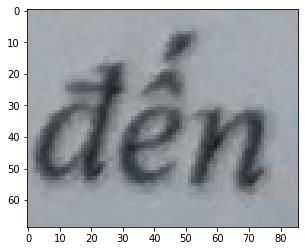

đế-----------------------n => đến                 


In [8]:
import torch
from torch.autograd import Variable
import utils
import dataset
from PIL import Image
import cv2
import models.crnn as crnn
import matplotlib.pyplot as plt

index = input()
model_path = './data/netCRNN_vnm.pth'
img_path = f'./data/image{index}_viet.png'
alphabet = " ,.0123456789ABCDGHIKLMNOPQRSTUVXY\\abcdefghijklmnopqrstuvwxyÀÁÂÃÒÓÔÙÚÝàáâãèéêìíòóôõùúýăĐđĨĩŨũƠơƯưẠạẢảấẦầẩẫẬậắặẹẽẾếềỂểễỆệỉỊịọỏốồỔổỗỘộỚớỜờỞởỡợỤụỦủứừửữỰựỳỷỹ"

model = crnn.CRNN(32, 1, 154, 256)
if torch.cuda.is_available():
    model = model.cuda()
    model = torch.nn.DataParallel(model)
print('loading pretrained model from %s' % model_path)
model.load_state_dict(torch.load(model_path))

converter = utils.strLabelConverter(alphabet)

transformer = dataset.resizeNormalize((100, 32))
image = Image.open(img_path).convert('L')
image = transformer(image)
if torch.cuda.is_available():
    image = image.cuda()
image = image.view(1, *image.size())
image = Variable(image)

model.eval()
preds = model(image)

_, preds = preds.max(2)
preds = preds.transpose(1, 0).contiguous().view(-1)

preds_size = Variable(torch.IntTensor([preds.size(0)]))
raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
sim_pred = converter.decode(preds.data, preds_size.data, raw=False)



img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print('%-20s => %-20s' % (raw_pred, sim_pred))


## **PART II**: ENGLISH DEMO

5
loading pretrained model from ./data/netCRNN_eng.pth


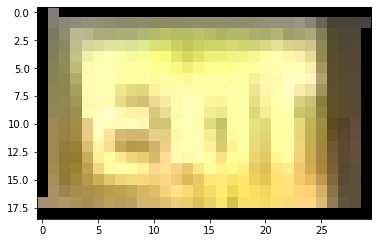

E---------X------tt------- => EXt                 


In [14]:
import torch
from torch.autograd import Variable
import utils
import dataset
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import models.crnn as crnn

index = input()
model_path = './data/netCRNN_eng.pth'
img_path = f'./data/image_eng_{index}.png'
alphabet = '#$%&0123456789@ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

model = crnn.CRNN(32, 1, 68, 256)
if torch.cuda.is_available():
    model = model.cuda()
    model = torch.nn.DataParallel(model)
print('loading pretrained model from %s' % model_path)
model.load_state_dict(torch.load(model_path))

converter = utils.strLabelConverter(alphabet)

transformer = dataset.resizeNormalize((100, 32))
image = Image.open(img_path).convert('L')
image = transformer(image)
if torch.cuda.is_available():
    image = image.cuda()
image = image.view(1, *image.size())
image = Variable(image)

model.eval()
preds = model(image)

_, preds = preds.max(2)
preds = preds.transpose(1, 0).contiguous().view(-1)

preds_size = Variable(torch.IntTensor([preds.size(0)]))
raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
sim_pred = converter.decode(preds.data, preds_size.data, raw=False)



img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print('%-20s => %-20s' % (raw_pred, sim_pred))
